#Toyota Corolla Problem

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [4]:
df = pd.read_csv("ToyotaCorolla.csv", encoding='latin1')

In [5]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
df2=pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)


In [8]:
df2.head()


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [9]:
df3 = df2.rename({'Age_08_04' : 'Age', 'cc' : 'CC', 'Quarterly_Tax' : 'QT'}, axis = 1)

In [10]:
df3.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [11]:
df3[df3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [12]:
df4 = df3.drop_duplicates()

In [13]:
df4[df4.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [14]:
df4.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


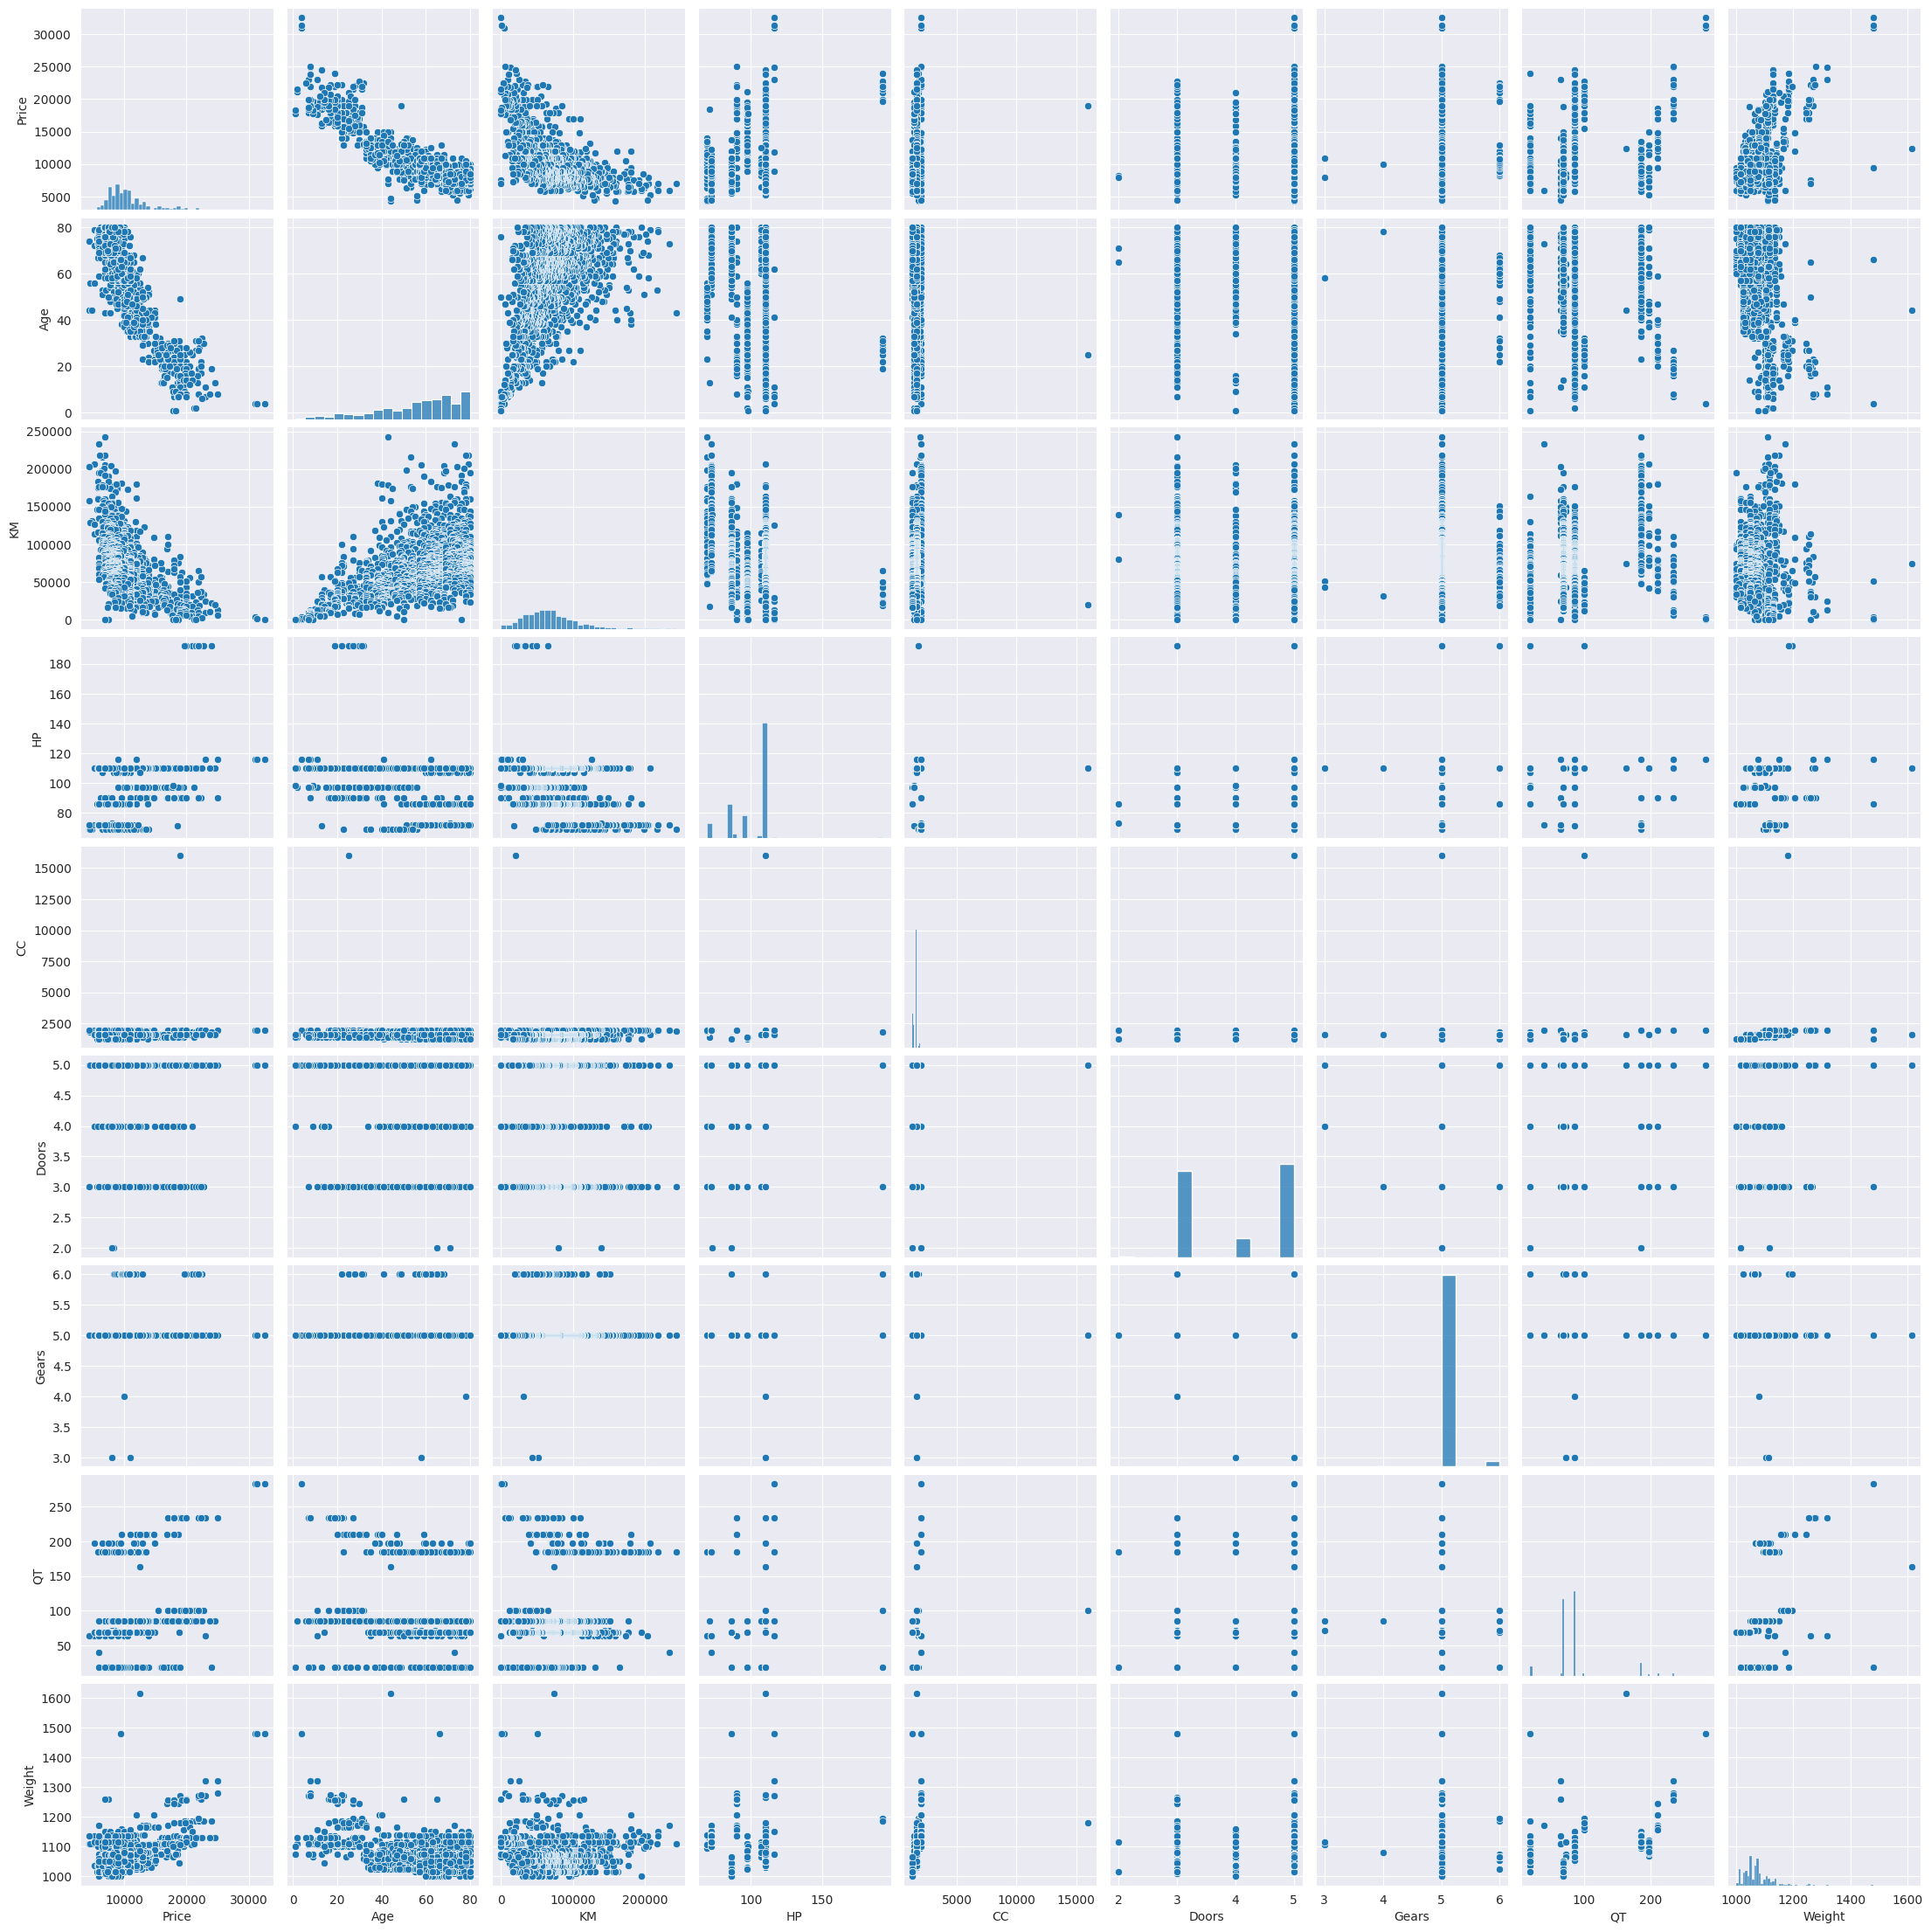

In [15]:
sns.set_style(style='darkgrid')
sns.pairplot(df4)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   CC      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   QT      1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [16]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df4).fit()

In [17]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:33:24   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
test_data = df4.sample(1)

In [22]:
test_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
939,10250,60,54554,110,1600,3,6,85,1065


In [23]:
model.predict(test_data)

939    11240.537187
dtype: float64

In [24]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

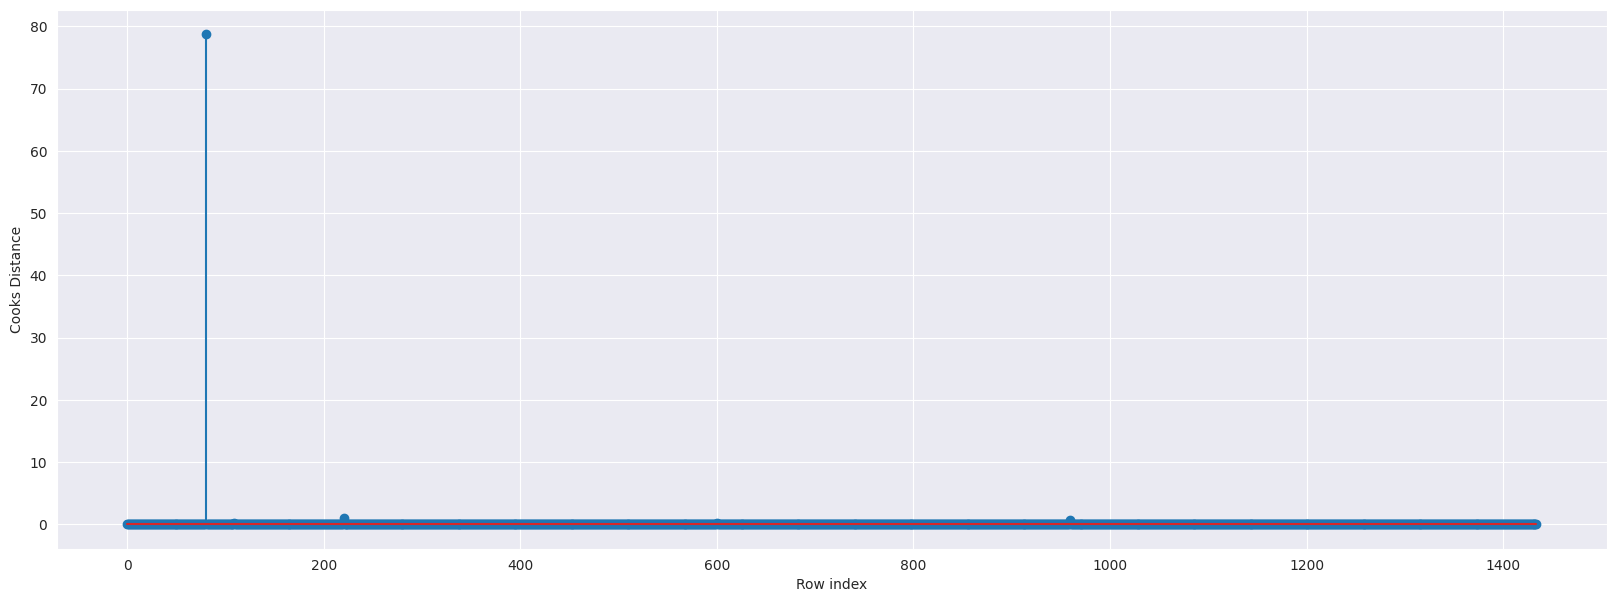

In [25]:
sns.set_style(style='darkgrid')
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

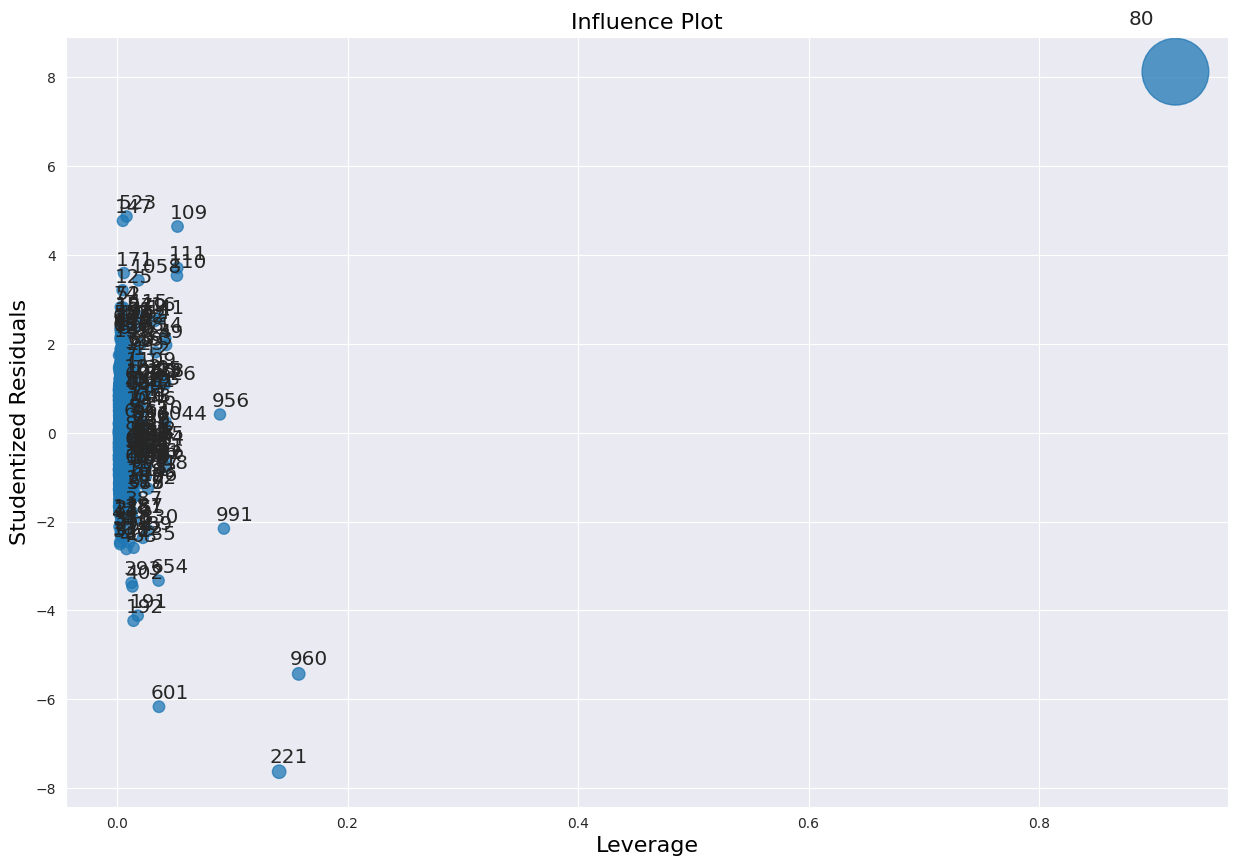

In [26]:
fig,ax=plt.subplots(figsize=(15,10))
fig=influence_plot(model,ax = ax)

#50 startups Problem

In [27]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [28]:
star = pd.read_csv('50_Startups.csv')

In [29]:
star.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
star.shape

(50, 5)

In [31]:
star.drop(['State'], axis = 1, inplace= True)

In [32]:
star.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [33]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [34]:
star[star.duplicated()]

,R&D Spend,Administration,Marketing Spend,Profit


In [35]:
star.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


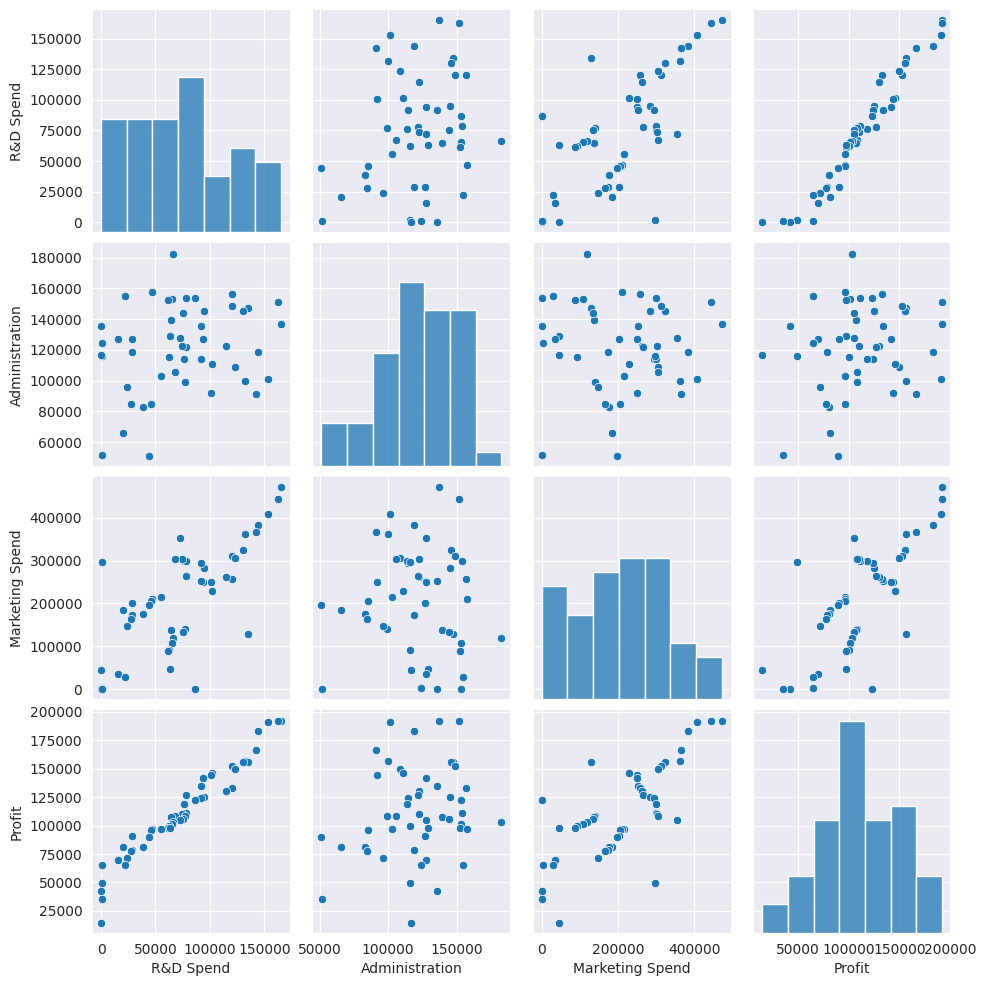

In [36]:
sns.set_style(style='darkgrid')
sns.pairplot(star)

In [38]:
star1 = star.rename({'R&D Spend': 'RDS','Administration': 'ADM','Marketing Spend': 'MKS'}, axis=1)

In [39]:
star1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADM     50 non-null     float64
 2   MKS     50 non-null     float64
 3   Profit  50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [40]:
regmod = smf.ols('Profit~RDS+ADM+MKS',data=star1).fit()

In [43]:
regmod.params

Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MKS              0.027228
dtype: float64

In [44]:
regmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           4.53e-30
Time:                        10:51:04   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKS            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
rsq_rds = smf.ols('RDS~ADM+MKS',data=star1).fit().rsquared
vif_rds = 1/(1-rsq_rds)
vif_rds

2.4689030699947017

In [47]:
rsq_adm = smf.ols('ADM~RDS+MKS',data=star1).fit().rsquared
vif_adm = 1/(1-rsq_adm)
vif_adm

1.1750910070550453

In [48]:
rsq_mks = smf.ols('MKS~RDS+ADM',data=star1).fit().rsquared
vif_mks = 1/(1-rsq_mks)
vif_mks

2.326773290530878

In [49]:
d1 = {'Variables':['RDS','ADM','MKS'],'VIF':[vif_rds,vif_adm,vif_mks]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MKS,2.326773


In [ ]:
#Going by the VIF values, none of the VIF values are less than 4, multicollinearity isnt a problem so we now plot influence plots
#This is being done to spot any extra influence by a single data point on the model and remove that datapoint to improve its accuracy.

In [50]:
regmod_influence = regmod.get_influence()
(c, _) = regmod_influence.cooks_distance

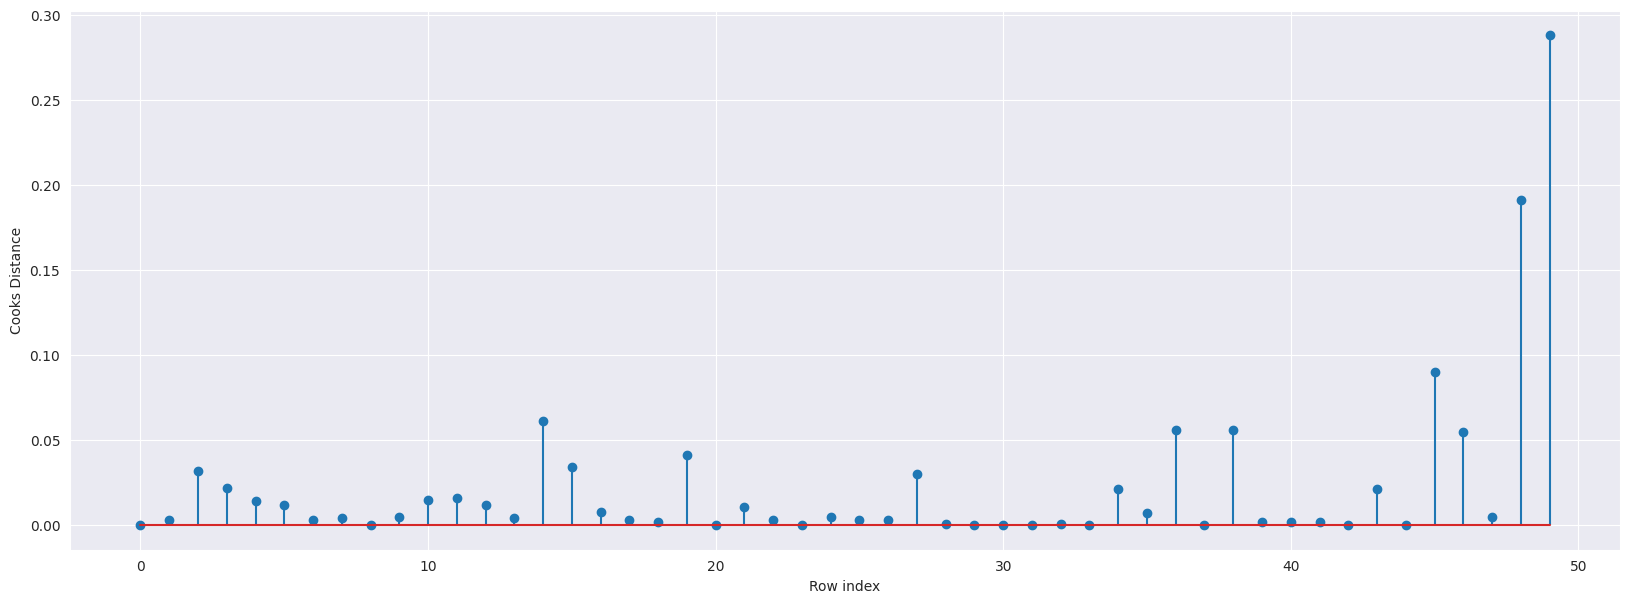

In [51]:
sns.set_style(style='darkgrid')
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(star1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

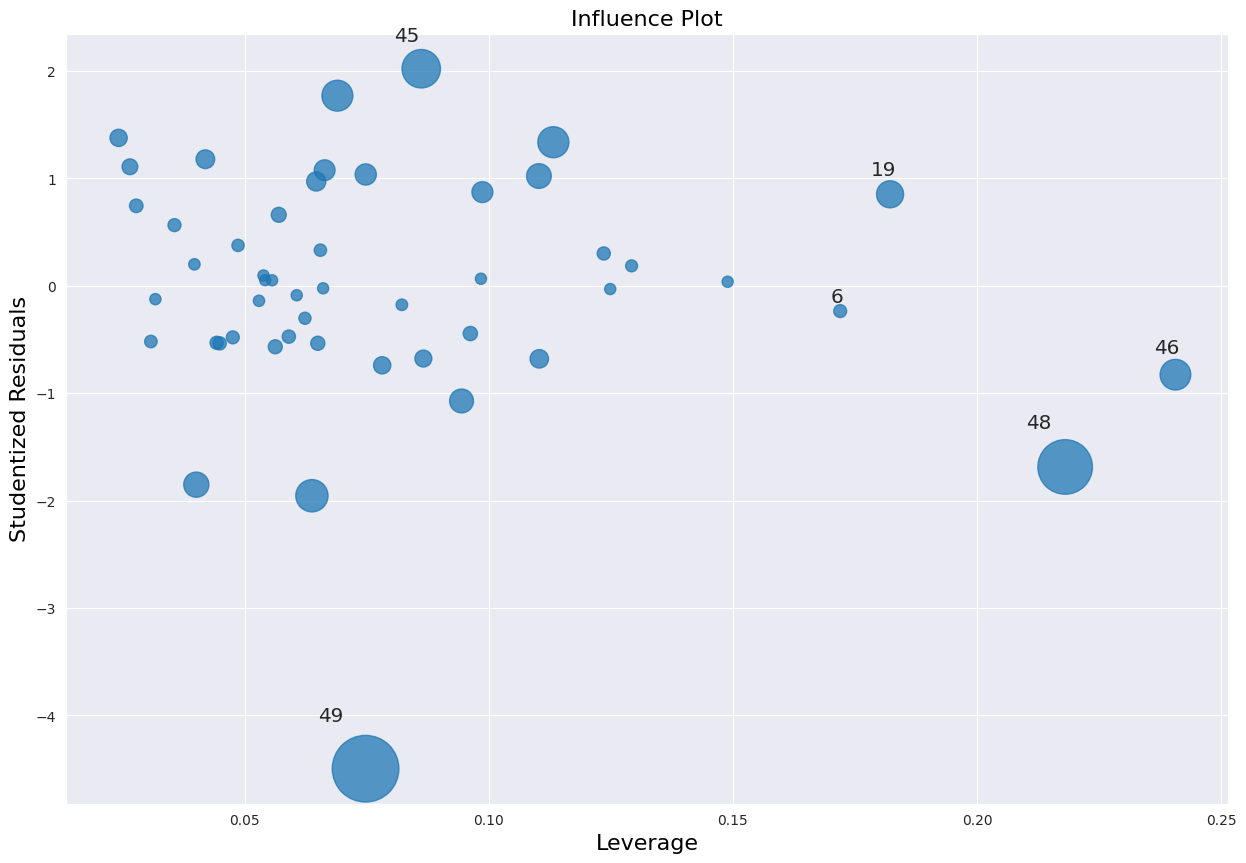

In [52]:
fig,ax=plt.subplots(figsize=(15,10))
fig=influence_plot(regmod,ax = ax)

In [ ]:
#Here we see that the datapoint at index number 49 is having way too much influence on the model.Hence we remove this entry and make a new model.

In [53]:
star1[star1.index.isin([49])]

,RDS,ADM,MKS,Profit
49,0.0,116983.8,45173.06,14681.4


In [55]:
star2=star1.drop(star1.index[[49]],axis=0).reset_index(drop=True)
star2.head()

,RDS,ADM,MKS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [56]:
regmod_final = smf.ols('Profit~RDS+ADM+MKS',data=star2).fit()

In [57]:
regmod_final.params

Intercept    52382.439251
RDS              0.783002
ADM             -0.022201
MKS              0.025234
dtype: float64

In [58]:
regmod_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           8.85e-32
Time:                        11:00:08   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADM           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKS            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
test = star2.sample(1)
test

,RDS,ADM,MKS,Profit
20,76253.86,113867.3,298664.47,118474.03


In [61]:
regmod_final.predict(test)

20    117097.731866
dtype: float64

In [62]:
d2={'Prepared_models':['regmod','regmod_final'],'Rsquared':[regmod.rsquared,regmod_final.rsquared]}
table=pd.DataFrame(d2)
table

,Prepared_models,Rsquared
0,regmod,0.950746
1,regmod_final,0.961316


In [ ]:
#Hence we have an improved model with higher accuracy